In [1]:
#Scenario: You are a Data Scientist working for a consulting firm. One of your  colleagues from the Auditing department has asked you to help them assess the financial statement of organisation X.
#You have been supplied with two lists of data: monthly revenue and monthly expenses for the financial year in question. Your task is to calculate the following 
#financial metrics:
#- profit for each month
#- profit after tax for each month (the tax rate is 30%)
#- profit margin for each month - equals to profit after tax divided by revenue
#- good months - where the profit after tax was greater than the mean for the year
#- bad months - where the profit after tax was less than the mean for the year
#- the best month - where the profit after tax was max for the year
#- the worst month - where the profit after tax was min for the year
#All results need to be presented as lists.
##presented in Units of $1,000 (i.e. 1k) with no decimal points.
#Results for the profit margin ratio need to be presented in units of % with no decimal points.
#Note: Your colleague has warned you that it is okay for tax for any given month to be negative (in accounting terms, negative tax translates into a deferred tax asset).
        

In [2]:
revenue_month = [{'Jan': 14574.49, 'Feb': 7606.46, 'March': 8611.41, 'April': 9175.41, 'May': 8058.65, 'June': 8105.44, 'July': 11496.28, 'August': 9766.09, 'Sept': 10305.32, 'Oct': 14379.96, 'Nov': 10713.97, 'Dec': 15433.50}]
expenses_month = [{'Jan': 12051.82, 'Feb': 5695.07, 'March': 12319.20, 'April': 12089.72, 'May': 8658.57,'June': 840.20, 'July': 3285.73, 'August': 5821.12, 'Sept': 6976.93, 'Oct': 16618.61,'Nov': 10054.37, 'Dec':  3803.96}]
months = ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'August', 'Sept', 'Oct', 'Nov', 'Dec']

In [3]:
revenue = [ 14574.49,  7606.46,  8611.41, 9175.41,  8058.65, 8105.44, 11496.28, 9766.09, 10305.32, 14379.96, 10713.97,  15433.50]
expenses = [ 12051.82,  5695.07, 12319.20,  12089.72,  8658.57, 840.20,  3285.73,  5821.12,  6976.93,  16618.61, 10054.37,  3803.96]

profit = [round(r - e, 2) for r, e in zip(revenue, expenses)]
profit


[2522.67,
 1911.39,
 -3707.79,
 -2914.31,
 -599.92,
 7265.24,
 8210.55,
 3944.97,
 3328.39,
 -2238.65,
 659.6,
 11629.54]

In [4]:
profit_after_tax = [round(p * (1-0.3), 2) for p in profit]
profit_after_tax


[1765.87,
 1337.97,
 -2595.45,
 -2040.02,
 -419.94,
 5085.67,
 5747.38,
 2761.48,
 2329.87,
 -1567.06,
 461.72,
 8140.68]

In [5]:
profit_margin = [round(pat / r, 3) * 100 for pat, r in zip(profit_after_tax, revenue)] 

In [6]:
mean = sum(profit_after_tax)/len(profit_after_tax)


In [7]:
good_months = [months + 1 for months, profit_after_tax in enumerate(profit_after_tax) if profit_after_tax > mean]
good_months

[0, 5, 6, 7, 8, 11]

In [8]:
bad_months = [month + 1 for month, profit_after_tax in enumerate(profit_after_tax) if profit_after_tax < mean]
bad_months

[1, 2, 3, 4, 9, 10]

In [9]:
The_Best_Month = [profit_margin.index(max(profit_margin))]

In [ ]:
The_Worst_Month = profit_margin.index(min(profit_margin))

In [22]:
def format_currency(value):
    return "${:,.0f}K".format(value/1000)
profit_after_tax_formatted = [format_currency(value) for value in profit_after_tax]
profit_margin_formatted = ["{:,.0f}%".format(value) for value in profit_margin]
print(f"Profit After Tax : {profit_after_tax_formatted}")
print(f"Profit Margin : {profit_margin_formatted}")
print(f"Good months : {good_months}")
print(f"Bad Months : {bad_months}")
print(f"The Best Month : {The_Best_Month}")
print(f"The Worst Month : {The_Worst_Month}")

Profit After Tax : ['$2K', '$1K', '$-3K', '$-2K', '$-0K', '$5K', '$6K', '$3K', '$2K', '$-2K', '$0K', '$8K']
Profit Margin : ['12%', '18%', '-30%', '-22%', '-5%', '63%', '50%', '28%', '23%', '-11%', '4%', '53%']
Good months : [0, 5, 6, 7, 8, 11]
Bad Months : [1, 2, 3, 4, 9, 10]
The Best Month : 5
The Worst Month : [2]


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

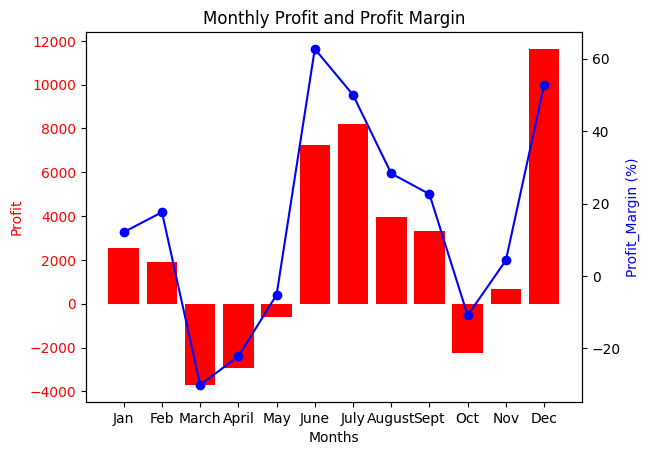

In [14]:
f, ax1 = plt.subplots()
ax1.bar(months, profit, color='Red')
ax1.set_xlabel('Months')
ax1.set_ylabel('Profit', color='Red')
ax1.tick_params(axis = 'y', labelcolor='Red')
ax2 = ax1.twinx()
ax2.plot(months, profit_margin, marker='o', color='Blue')
ax2.set_ylabel('Profit_Margin (%)', color='Blue')
plt.title('Monthly Profit and Profit Margin')
plt.show()


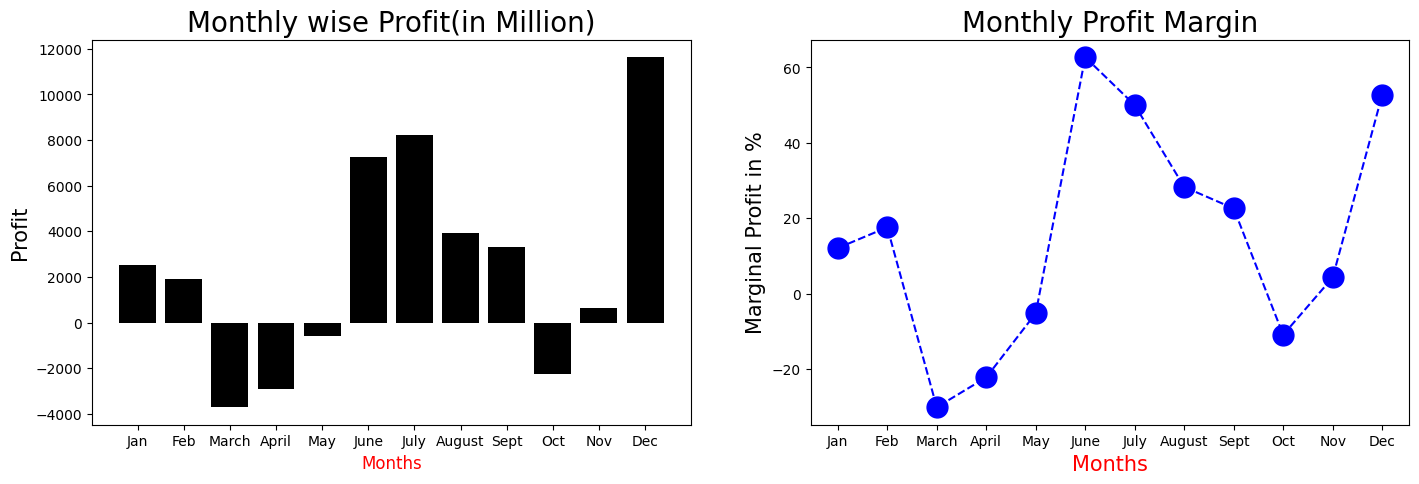

In [15]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,5))
ax1.bar(months, profit, color='Black')
ax1.set_xlabel('Months', color='Red', fontsize=12)
ax1.set_ylabel('Profit', fontsize=15)
ax1.set_title('Monthly wise Profit(in Million)', fontsize=20)
ax2.plot(months, profit_margin, color='Blue', marker='o', ms=15, ls='--')
ax2.set_xlabel('Months', color='Red', fontsize=15)
ax2.set_ylabel('Marginal Profit in %', fontsize=15)
ax2.set_title('Monthly Profit Margin', fontsize=20)
plt.show()
